<h1 align="center">An Introduction to Python for Economic Data Analysis   

The purpose of this notebook is to provide an introduction to some of the capabilities of Python. This overview will include  how to download economics data from Quandl, combine different data sources, then analyze the data in pandas, and finally provide an example of a simple linear regression.   

For the purpose of this demonstration, we'll do an analysis similar to the Phillip's Curve. The Phillip's curve hypothesized that unemployment rate and inflation had an inverse, stable relationship. 

### Contents  
[Import Basic Libraries](#libs)  
[Fetch Inflation Data from Quandl](#CPI)  
[Fetch Unemployment Data from Quandl](#Unemp)  
[Combine Datasets](#concat)  
[Analyze Datasets](#analyze)  
[Create Model Features](#features)  
[Using Stats Models for Ordinary Least Squares Regression](#stats)  
[Using Sci-Kit Learn for Ordinary Least Squares Regression](#scikit)  
[Conclusion](#conclusion)  

<a id='libs'></a>
### Import Basic Libraries

#### Why so many libraries?  
  
The most powerful feature of Python is the community. As an open source language, anyone can create a library for you to download and use. These libraries can be installed using the command "pip install [library name]" on the command line.

#### Why did we choose these libraries?  
- Numpy: Numpy (NUM-pie) is one of the most rudimentary quantitative libraries in Python. 
- Pandas: Pandas is Python's most powerful library for data analysis. Pandas allows users to import, filter, analyze, and visualize data. Pandas uses a feature called "dataframes" to process data at very quick speeds in memory. Pandas was created to replicate many of R's functions.
- Quandl: This is the API Quandl created for downloading data into Pandas dataframes.
- Warnings: Allows for disabling of iPython Notebook warnings
- qGrid: Uses Javascript to allow interactive tables to be imbeded into the iPython Notebook. For more information on the qGrid project, visit: http://nbviewer.ipython.org/github/quantopian/qgrid/blob/master/qgrid_demo.ipynb

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import Quandl as qd
import warnings
warnings.filterwarnings('ignore')


#Nick's Quandl Auth token
auth = '9zjPBpsaLGqS-KPGzvyn'

In [5]:
#Import qGrid to allow for interactive tables
import qgrid as q
q.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder 
q.set_defaults(remote_js=True, precision=4)


<a id='CPI'></a>  
  
### Fetch Inflation Data From Quandl




#### What is Quandl and why are we pulling data from it?

Quandl is an online data warehouse which has thousands of public datasets. Quandl's API is set up to pull data directly into a Pandas dataframe, and it automatically sets the date as the index.  For more info on using Quandl with Python, visit: https://www.quandl.com/help/python

In [6]:
df_cpi = qd.get('FRBC/USINFL', authtoken=auth, collapse='annual')
df_cpi.tail()

,CPI-U: All Items (SA; 1982-84=100) (Bureau of Labor Statistics),CPI-U: All Items (SA; 1982-84=100) % Change - Period to Period (Bureau of Labor Statistics),CPI-U: All Items (NSA; 1982-84=100) % Change - Year to Year (Bureau of Labor Statistics),CPI-U: All Items Less Food and Energy (SA; 1982-84=100) (Bureau of Labor Statistics),CPI-U: All Items Less Food and Energy (SA; 1982-84=100) % Change - Period to Period (Bureau of Labor Statistics),CPI-U: All Items Less Food and Energy (NSA; 1982-84=100) % Change - Year to Year (Bureau of Labor Statistics),Original FRB Cleveland Median CPI (SAAR; %chg) (Federal Reserve Bank of Cleveland),Original FRB Cleveland Median CPI (SA; %chg) (Federal Reserve Bank of Cleveland),Original FRB Cleveland Median CPI (SA; 12 Month %chg) (Federal Reserve Bank of Cleveland),PPI: Finished Goods (SA; 1982=100) (Bureau of Labor Statistics),...,Original 16% trimmed mean (12 month %chg) (Federal Reserve Bank of Cleveland),Original 16% trimmed mean (SAAR; %chg) (),Revised FRB Cleveland Median CPI (SA; Dec-82=1) (Federal Reserve Bank of Cleveland),Revised FRB Cleveland Median CPI (SA month-to-month %chg) (Federal Reserve Bank of Cleveland),RevisedFRB Cleveland Median CPI (SA; 12 Month %chg) (Federal Reserve Bank of Cleveland),RevisedFRB Cleveland Median CPI (SAAR; %chg) (),Revised 16% trimmed mean (SA; Dec-82=1) (Federal Reserve Bank of Cleveland),Revised 16% trimmed mean (SA month-to-month %chg) (Federal Reserve Bank of Cleveland),Revised 16% trimmed mean (12 month %chg) (Federal Reserve Bank of Cleveland),Revised 16% trimmed mean (SAAR; %chg)
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,220.437,0.406752,1.495723,222.288,0.081042,0.804454,NaN,NaN,NaN,183.9,...,NaN,NaN,2.324277,0.112541,0.730136,1.358886,2.210981,0.122552,0.838698,1.480579
2011-12-31,227.093,-0.018931,2.962419,227.265,0.156008,2.229536,NaN,NaN,NaN,192.5,...,NaN,NaN,2.374239,0.192794,2.149584,2.338215,2.266577,0.120418,2.514502,1.454622
2012-12-31,231.099,-0.039362,1.741022,231.562,0.102453,1.893358,NaN,NaN,NaN,195.2,...,NaN,NaN,2.424357,0.133728,2.110927,1.616596,2.309504,0.094993,1.893915,1.145889
2013-12-31,234.594,0.239710,1.501736,235.542,0.101146,1.717071,NaN,NaN,NaN,198.0,...,NaN,NaN,2.474281,0.196737,2.059234,2.386552,2.347615,0.162431,1.650211,1.966678
2014-12-31,236.149,-0.372524,0.756493,239.339,0.002925,1.606383,NaN,NaN,NaN,196.7,...,NaN,NaN,2.529360,0.172587,2.226089,2.090811,2.389326,0.096095,1.776733,1.159257


For the purpose of our analysis, we're going to use the most basic CPI metric.

In [7]:
df_cpi = df_cpi.ix[:,:1]
df_cpi.tail()

,CPI-U: All Items (SA; 1982-84=100) (Bureau of Labor Statistics)
Date,
2010-12-31,220.437
2011-12-31,227.093
2012-12-31,231.099
2013-12-31,234.594
2014-12-31,236.149


Pandas allows for easy plotting. In iPython Notebooks, the "magic" command "%matplotlib inline" must be used to display these graphics.

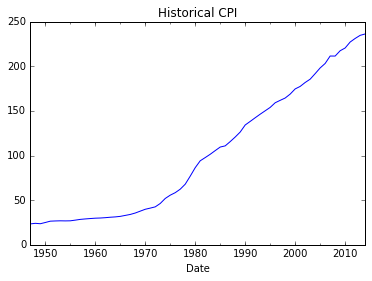

In [8]:
df_cpi.reset_index().plot(x='Date', y='CPI-U: All Items (SA; 1982-84=100) (Bureau of Labor Statistics)',\
                          legend=False,title='Historical CPI')

            A historical view of CPI.

<a id='Unemp'></a>  
### Fetch Unemployment Data from Quandl

In [9]:
df_unemp = qd.get('ECPI/JOB_UNEMPLOYMENT_RATE',collapse='quarterly',authtoken=auth)
df_unemp.tail()

,Total,Men,Women,White,African American,Hispanic,Asian,Age 16-24,Age 25-54,Age 55+,White Collar,Blue Collar,Services
Year,,,,,,,,,,,,,
2007-12-31,4.6,4.7,4.5,4.1,8.3,5.6,3.2,10.5,3.7,3.1,3.007912,6.041383,5.931819
2008-12-31,5.8,6.1,5.4,5.2,10.1,7.6,4.0,12.8,4.8,3.8,3.778128,8.160702,6.742745
2009-12-31,9.3,10.3,8.1,8.5,14.8,12.1,7.3,17.6,8.3,6.6,6.188264,14.377497,9.570962
2010-12-31,9.6,10.5,8.6,8.7,16.0,12.5,7.5,18.4,8.6,7.0,6.458873,14.284966,10.271156
2011-12-31,8.9,9.4,8.5,7.9,15.8,11.5,7.0,17.3,7.9,6.6,6.132580,12.216036,9.912423


The Pandas "ix" command allows us to grab slices (syntax is [row:row , column:column]) of a dataframe. In this command, we select all rows, and columns 0-1 (the first column.

In [10]:
df_unemp = df_unemp.ix[:,:1]
q.show_grid(df_unemp)

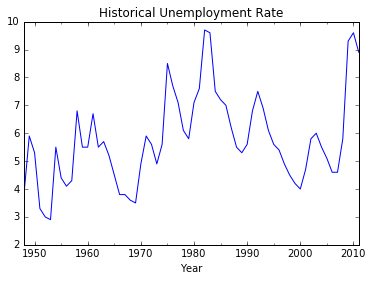

In [11]:
df_unemp.reset_index().plot(x='Year', y='Total',legend=False, title='Historical Unemployment Rate')

       A historical view of Unemployment Rate.

<a id='concat'></a>  
### Combine Datasets

Pandas allows programmers to combine datasets using very simple commands. Since each of our dataframes has a date index, Pandas knows this is the primary key it will join on. The Concat function defaults to an outer join; however, inner joins can be used as well. If we were merging two dataframes which did not have a common index, we would use the "merge" command and specify which columns to merge on.


In [12]:
df = pd.concat([df_cpi, df_unemp],axis=1)
df.columns =  [ 'CPI','Unemployment_Rate',]

The SQL equivalent to the previous command is:  

select df_cpi.[CPI-U: All Items (SA; 1982-84=100) (Bureau of Labor Statistics] as CPI, df_unemp.Total as Unemployment_Rate  
into df
from df_cpi full outer join df_unemp  
on df_cpi.Date = df_unemp.Date

In [13]:
q.show_grid(df)

In [14]:
df = df.dropna()

<a id='analyze'></a>  
### Analyze Data

The Pandas function describe() provides summary statistics for each numeric field in a DataFrame. 

In [15]:
q.show_grid(df.describe())

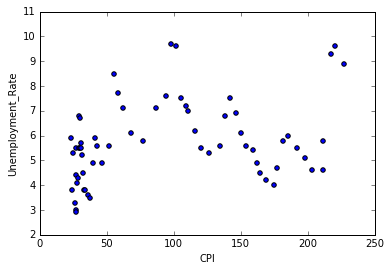

In [16]:
df.plot(kind='scatter', x='CPI', y='Unemployment_Rate')

In [17]:
df.corr()

,CPI,Unemployment_Rate
CPI,1.000000,0.317526
Unemployment_Rate,0.317526,1.000000


As you can see by the scatter plot and the correlation statistics, the correlation between absolute CPI and Umemployment Rate is weak.

<a id='features'></a>  
### Create Model Features

Before conducting a regression analysis, we must create features for the model to use. In this example, we will calculate aboslute change in CPI and Unemployment Rate over a 5 year span.

In [18]:
lag_periods = 5
df['CPI_Change'] = df.CPI.diff(periods=lag_periods)
df['Unemployment_Rate_Change'] = df.Unemployment_Rate.diff(lag_periods)

In [19]:
df['CPI_Pct_Change'] = df['CPI'].pct_change(periods=lag_periods) * 100
df['Unemployment_Rate_Pct_Change'] = df['Unemployment_Rate'].pct_change(periods=lag_periods) * 100
df = df.dropna()
df.head()

,CPI,Unemployment_Rate,CPI_Change,Unemployment_Rate_Change,CPI_Pct_Change,Unemployment_Rate_Pct_Change
1953-12-31,26.87,2.9,2.82,-0.9,11.725572,-23.684211
1954-12-31,26.77,5.5,3.16,-0.4,13.384159,-6.779661
1955-12-31,26.87,4.4,1.89,-0.9,7.566053,-16.981132
1956-12-31,27.63,4.1,1.16,0.8,4.382320,24.242424
1957-12-31,28.47,4.3,1.76,1.3,6.589292,43.333333


The pandas df.corr() funciton displays the correlation between all columns in a given dataframe.

In [20]:
df.corr()

,CPI,Unemployment_Rate,CPI_Change,Unemployment_Rate_Change,CPI_Pct_Change,Unemployment_Rate_Pct_Change
CPI,1.000000,0.261343,0.729992,0.042150,-0.086661,0.002670
Unemployment_Rate,0.261343,1.000000,0.556241,0.675343,0.506592,0.625618
CPI_Change,0.729992,0.556241,1.000000,0.126013,0.580761,0.042403
Unemployment_Rate_Change,0.042150,0.675343,0.126013,1.000000,0.213445,0.957519
CPI_Pct_Change,-0.086661,0.506592,0.580761,0.213445,1.000000,0.139797
Unemployment_Rate_Pct_Change,0.002670,0.625618,0.042403,0.957519,0.139797,1.000000


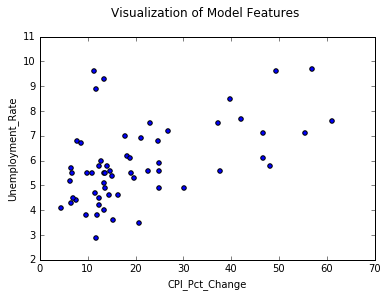

In [21]:
df.plot(kind='scatter', x='CPI_Pct_Change', y='Unemployment_Rate', title= "Visualization of Model Features \n")

After analyzing our model features, the 5 year change in CPI (CPI_Pct_Change) was chosen as the predictive variable for Unemployment Rate. While absolute change in CPI had a stronger correlation, using this variable would cause years in which CPI was larger (2000-2012) to be overemphasized.

<a id='stats'></a>  
### OLS Regression using Stats Models

Now that we've chosen our model features, it's time to do a regression. For more information on the code seen below, visit [here](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb).

In [22]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# create a fitted model in one line
lm = smf.ols(formula='Unemployment_Rate ~ CPI_Pct_Change', data=df).fit()

# print the coefficients
lm.params

Intercept         4.714942
CPI_Pct_Change    0.056395
dtype: float64

In [23]:
# create a DataFrame with the minimum and maximum values of CPI Pct Change
X_new = pd.DataFrame({'CPI_Pct_Change': [df.CPI_Pct_Change.min(), df.CPI_Pct_Change.max()]})
X_new.head()

,CPI_Pct_Change
0,4.382320
1,61.130137


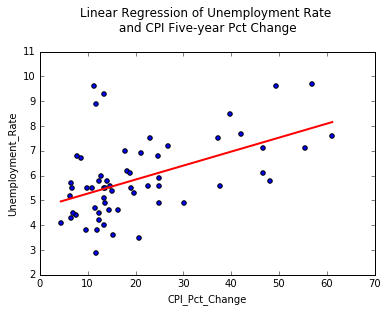

In [24]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

# first, plot the observed data
df.plot(kind='scatter', x='CPI_Pct_Change', y='Unemployment_Rate',\
        title="Linear Regression of Unemployment Rate \n and CPI Five-year Pct Change \n")

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [25]:
lm.rsquared

0.25663545312870895

That didn't go so well.

<a id='scikit'></a>  
### OLS Regression using Sci Kit Learn

Sci-kit learn is one of the most powerful libraries in the Python family. For more information and examples of the various machine learning algorithms you can leverage from Sci-Kit learn, visit [here](http://scikit-learn.org/stable/auto_examples/index.html).

In [26]:
# create X and y
df = df.dropna()

X = df.CPI_Pct_Change
y = df.Unemployment_Rate

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X[:,np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [27]:
# print intercept and coefficients
print lm.intercept_
print lm.coef_

4.71494215958
[ 0.05639542]


In [28]:
# calculate the R-squared
lm.score(X[:,np.newaxis], y)

0.25663545312870895

<a id='conclusion'></a>
### Conclusion

While unfortunately our model of simple change in inflation rate turned out not to be a great predictor of unemployment rate, I hope you found this to be a useful introduction of Python for Economic Data Analysis! 